# Capstone Project - The Battle of the Neighborhoods (Week 2)
## Applied Data Science Capstone by IBM/Coursera

## [Introduction](#intro)
## [Data](#data)
## [Methodology](#methodology)
## [Results](#results)
## [Discussion](#discussion)
## [Analysis](#analysis)
## [Conclusion](#conclusion)

## Introduction: Business Problem <a id='intro' name="introduction"></a>

Hue and Da Nag are two cities in central Vietnam. They are both on the coast of Vietnam, but Da Nang is more renowned for beaches than Hue. 
Hue on the other hand is known for being the former center of power in Vietnam and was the seat of Royalty until 1947.  
Both a major tourist attractions, or at least were until Covid19. 
I will compare the two cities as they stand today.
In particular I will look at the tips and see if there is a correlation between the length of the tip and the rating given.
The work here is aimed at someone who wants to make a decision about which city to visit and an exercise in small data Machine Learning.


# Data<a id='data' name="data"></a>

Import some libraries to do the work with.

In [3]:
import pandas as pd
import numpy as np
!pip install geocoder
import geocoder
import time
from os import path
from PIL import Image
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
print("Libraries mported")

     |████████████████████████████████| 366 kB 15.9 MB/s eta 0:00:01
Libraries mported


In [4]:
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
!pip install folium
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from folium import IFrame
print('Libraries imported.')

     |████████████████████████████████| 94 kB 4.9 MB/s  eta 0:00:01
Libraries imported.


Find the latitude and longitude of Da Nang, Vietnam

In [5]:
address = 'Da Nang, VN'

geolocator = Nominatim(user_agent="da_nang_explorer")
location_danang = geolocator.geocode(address)
latitude_danang = location_danang.latitude
longitude_danang = location_danang.longitude
print('The geograpical coordinate of Da Nang is {}, {}.'.format(latitude_danang, longitude_danang))

The geograpical coordinate of Da Nang is 16.068, 108.212.


Find the latitude and longitude of Hue, Vietnam

In [7]:
address = 'Hue, VN'

geolocator2 = Nominatim(user_agent="hue_explorer")
location = geolocator2.geocode(address)
latitude_hue = location.latitude
longitude_hue = location.longitude
print('The geograpical coordinate of Hue is {}, {}.'.format(latitude_hue, longitude_hue))

The geograpical coordinate of Hue is 16.4638013, 107.5821911.


Lets look at the locations of Hue and Da Nang on a map

In [8]:
# create map of Da Nang and Hue using latitude and longitude values
map_cities = folium.Map(location=[((latitude_danang + latitude_hue)/2), ((longitude_danang + longitude_hue)/2)], zoom_start=10)


folium.Marker(
    location=[latitude_danang, longitude_danang],
    popup="Da Nang",
    icon=folium.Icon(icon="green"),
).add_to(map_cities)

folium.Marker(
    location=[latitude_hue, longitude_hue],
    popup="Hue",
    icon=folium.Icon(icon="green"),
).add_to(map_cities)
   
map_cities

# Methodology<a id='methodology' name="methodology"></a>

We will use data from FourSquare to look at venues in the two cities in a 4000 m radius from the coordinates we found.

FourSquare details

In [9]:
# @hidden_cell
CLIENT_ID = 'ASLRSSRSCZFW0ARKQMC1D1GLL34HUDLR05X1QTOHKSVCFKCD' # your Foursquare ID
CLIENT_SECRET = 'LMGOR3GF2MCQRV0AEDHUH32EQGTYGYARI3X033ZCMUGELV0T' # your Foursquare Secret
ACCESS_TOKEN = 'TAGWFHVL2HQG5MU3EO1MOZHPEIJX0HAZ14TZ5TRGWXAUH44J' # your FourSquare Access Token
VERSION = '20180323' #20180604
LIMIT = 100
radius =4000

Get some information from FourSquare about Da Nang using the venues/explore end point. 

%%html
<a href="https://developer.foursquare.com/docs/api-reference/venues/explore/">FourSquare API</a>

In [10]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_danang, 
    longitude_danang, 
    radius, 
    LIMIT)

In [11]:
results_danang = requests.get(url).json()
results_danang

{'meta': {'code': 200, 'requestId': '6033420d79984642d338fd0e'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Da Nang',
  'headerFullLocation': 'Da Nang',
  'headerLocationGranularity': 'city',
  'totalResults': 126,
  'suggestedBounds': {'ne': {'lat': 16.104000036000038,
    'lng': 108.249393644179},
   'sw': {'lat': 16.031999963999965, 'lng': 108.17460635582101}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '582b1746641e5c276f013971',
       'name': "Pizza 4P's",
       'contact': {},
       'location': {'address': '8 Hoàng Văn Thụ',
        'lat': 16.062674975021636,
        'lng': 108.2228449147913,
        'labeledLatLngs': [{'label': 'display',
          'lat': 16.06267

In [12]:
items_danang = results_danang['response']['groups'][0]['items']
items_danang[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '582b1746641e5c276f013971',
  'name': "Pizza 4P's",
  'contact': {},
  'location': {'address': '8 Hoàng Văn Thụ',
   'lat': 16.062674975021636,
   'lng': 108.2228449147913,
   'labeledLatLngs': [{'label': 'display',
     'lat': 16.062674975021636,
     'lng': 108.2228449147913}],
   'distance': 1302,
   'cc': 'VN',
   'city': 'Đà Nẵng',
   'state': 'Thành Phố Đà Nẵng',
   'country': 'Việt Nam',
   'formattedAddress': ['8 Hoàng Văn Thụ',
    'Đà Nẵng',
    'Thành Phố Đà Nẵng',
    'Việt Nam']},
  'categories': [{'id': '4bf58dd8d48988d1ca941735',
    'name': 'Pizza Place',
    'pluralName': 'Pizza Places',
    'shortName': 'Pizza',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_',
     'suffix': '.png'},
    'primary': True}],
  'verified': False,
  'stats': {'tipCount': 0,
   'usersCount': 0,
   'check

In [13]:
#fetching omly relevant data from categories
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#flatten JSON, Normalize JSON to Dataframe
dataframe = pd.json_normalize(items_danang) 

# filter columns,consider only required columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
nearby_danang = dataframe.loc[:, filtered_columns]

# filter the category for each row
nearby_danang['venue.categories'] = nearby_danang.apply(get_category_type, axis=1)

# clean columns
nearby_danang.columns = [col.split('.')[-1] for col in nearby_danang.columns]

#replce NaN values with Not found in address
nearby_danang['address'] = nearby_danang['address'].fillna("Not found")
nearby_danang.head()   

,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,crossStreet,postalCode,neighborhood,id
0,Pizza 4P's,Pizza Place,8 Hoàng Văn Thụ,16.062675,108.222845,"[{'label': 'display', 'lat': 16.06267497502163...",1302,VN,Đà Nẵng,Thành Phố Đà Nẵng,Việt Nam,"[8 Hoàng Văn Thụ, Đà Nẵng, Thành Phố Đà Nẵng, ...",NaN,NaN,NaN,582b1746641e5c276f013971
1,cộng cà phê,Coffee Shop,39,16.068063,108.223512,"[{'label': 'display', 'lat': 16.06806287945548...",1231,VN,Đà Nẵng,Thành Phố Đà Nẵng,Việt Nam,"[39 (Nguyễn Thái Học), Đà Nẵng, Thành Phố Đà N...",Nguyễn Thái Học,551105,NaN,5a26a41a31ac6c676705e94c
2,Nướng Đà Thành,BBQ Joint,Lô 1-2 B2.4 Nguyễn Văn Linh,16.060689,108.218386,"[{'label': 'display', 'lat': 16.06068929153090...",1062,VN,Đà Nẵng,Thành Phố Đà Nẵng,Việt Nam,[Lô 1-2 B2.4 Nguyễn Văn Linh (Huỳnh Thúc Kháng...,Huỳnh Thúc Kháng,NaN,NaN,5405d20d498eae2180a53eab
3,Thìa Gỗ Restaurant - Danang (Quán ăn Thìa Gỗ -...,Vietnamese Restaurant,37 Ba Đinh,16.076115,108.218690,"[{'label': 'display', 'lat': 16.07611473938317...",1152,VN,Đà Nẵng,Thành Phố Đà Nẵng,Việt Nam,"[37 Ba Đinh, Đà Nẵng, Thành Phố Đà Nẵng, Việt ...",NaN,551300,NaN,5aabf13ed552c7495c4b16cc
4,Mì Quảng Bà Mua,Vietnamese Restaurant,21 Trần Bình Trọng,16.065974,108.219153,"[{'label': 'display', 'lat': 16.06597405743636...",797,VN,Đà Nẵng,Thành Phố Đà Nẵng,Việt Nam,"[21 Trần Bình Trọng, Đà Nẵng, Thành Phố Đà Nẵn...",NaN,NaN,NaN,4f842b4ce4b05b009467b674


Lets draw a map with all the Da Nang venues we got

In [14]:
# creating map zoom at present Location
map_danang = folium.Map(location=[latitude_danang,longitude_danang],zoom_start=14)

# adding the current location to map
folium.CircleMarker(location=[latitude_danang,longitude_danang],radius=5,color='red',fill=True,fill_color='red').add_to(map_danang)
folium.Marker(location=[latitude_danang,longitude_danang],popup="<strong> Current Location</strong>",icon = folium.Icon(color='red')).add_to(map_danang)

# drawing radius of search
folium.Circle(location=[latitude_danang,longitude_danang],radius=radius,color='blue',opacity=0.5,fill=True,fill_color='blue').add_to(map_danang)

# adding all the popular places around
for lat,lon,name,cate,addr,dist in zip(nearby_danang.lat,nearby_danang.lng,nearby_danang.name,nearby_danang.categories,nearby_danang.address,nearby_danang.distance):
  folium.CircleMarker(location=[lat,lon],radius=5,color="red",fill=True,fill_color='red').add_to(map_danang)
  folium.Marker(location=[lat,lon],
              popup= folium.Popup(('<strong><font color ="red">Name :     </font>'+name+'</strong><br>'+
                                   '<strong><font color ="red">Categorie :    </font>'+cate+'</strong><br>'+
                                   '<strong><font color ="red">Address :    </font>'+addr+'</strong><br>'+
                                   '<strong><font color ="red">Distance :    </font>'+str(dist)+' mts</strong>'
                                   ),max_width=250)).add_to(map_danang)

map_danang

Pull info on Hue venues using the venues/explore API endpoint

In [15]:

url2 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_hue, 
    longitude_hue, 
    radius, 
    LIMIT)

In [16]:
results_hue = requests.get(url2).json()
results_hue

{'meta': {'code': 200, 'requestId': '60334226078f3e56b8e9a607'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Huế',
  'headerFullLocation': 'Huế',
  'headerLocationGranularity': 'city',
  'totalResults': 64,
  'suggestedBounds': {'ne': {'lat': 16.499801336000036,
    'lng': 107.619660190731},
   'sw': {'lat': 16.427801263999964, 'lng': 107.54472200926901}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bd1ab4a5e0cce720acfa184',
       'name': 'La Residence Hue Hotel & Spa',
       'contact': {},
       'location': {'address': '5 Le Loi Street',
        'lat': 16.459127862940925,
        'lng': 107.58007233528453,
        'labeledLatLngs': [{'label': 'display',
          'lat'

In [17]:
items_hue = results_hue['response']['groups'][0]['items']
items_hue[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4bd1ab4a5e0cce720acfa184',
  'name': 'La Residence Hue Hotel & Spa',
  'contact': {},
  'location': {'address': '5 Le Loi Street',
   'lat': 16.459127862940925,
   'lng': 107.58007233528453,
   'labeledLatLngs': [{'label': 'display',
     'lat': 16.459127862940925,
     'lng': 107.58007233528453}],
   'distance': 567,
   'postalCode': '530000',
   'cc': 'VN',
   'city': 'Huế',
   'state': 'Tỉnh Thừa Thiên-Huế',
   'country': 'Việt Nam',
   'formattedAddress': ['5 Le Loi Street',
    'Huế',
    'Tỉnh Thừa Thiên-Huế',
    'Việt Nam']},
  'categories': [{'id': '4bf58dd8d48988d132951735',
    'name': 'Hotel Pool',
    'pluralName': 'Hotel Pools',
    'shortName': 'Pool',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/pool_',
     'suffix': '.png'},
    'primary': True}],
  'verified': True,
  'stats'

In [18]:
#fetching omly relevant data from categories
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#flatten JSON, Normalize JSON to Dataframe
dataframe = pd.json_normalize(items_hue) 

# filter columns,consider only required columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
nearby_hue = dataframe.loc[:, filtered_columns]

# filter the category for each row
nearby_hue['venue.categories'] = nearby_hue.apply(get_category_type, axis=1)

# clean columns
nearby_hue.columns = [col.split('.')[-1] for col in nearby_hue.columns]

#replce NaN values with Not found in address
nearby_hue['address'] = nearby_hue['address'].fillna("Not found")
nearby_hue.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,La Residence Hue Hotel & Spa,Hotel Pool,5 Le Loi Street,16.459128,107.580072,"[{'label': 'display', 'lat': 16.45912786294092...",567,530000,VN,Huế,Tỉnh Thừa Thiên-Huế,Việt Nam,"[5 Le Loi Street, Huế, Tỉnh Thừa Thiên-Huế, Vi...",NaN,4bd1ab4a5e0cce720acfa184
1,Lạc Thiên,Vietnamese Restaurant,6A Đinh Tiên Hoàng,16.468668,107.585144,"[{'label': 'display', 'lat': 16.468668, 'lng':...",626,NaN,VN,Huế,Tỉnh Thừa Thiên-Huế,Việt Nam,"[6A Đinh Tiên Hoàng (Trần Hưng Đạo), Huế, Tỉnh...",Trần Hưng Đạo,4d3ab780325ff04df0dc1e45
2,Nook Cafe & Bar,Breakfast Spot,7/34 Nguyen Tri Phuong,16.464730,107.593040,"[{'label': 'display', 'lat': 16.46473, 'lng': ...",1162,NaN,VN,Huế,Tỉnh Thừa Thiên-Huế,Việt Nam,"[7/34 Nguyen Tri Phuong, Huế, Tỉnh Thừa Thiên-...",NaN,583848f313bb7732ce36366c
3,The Scarlett Boutique Hotel,Hotel,Not found,16.467528,107.594623,"[{'label': 'display', 'lat': 16.467528, 'lng':...",1390,NaN,VN,NaN,NaN,Việt Nam,[Việt Nam],NaN,57c5bd65498eb3403f51e7e6
4,Nina's Cafe,Vietnamese Restaurant,16/34 Nguyễn Trí Phương,16.464284,107.592762,"[{'label': 'display', 'lat': 16.46428415334502...",1129,NaN,VN,Huế,Tỉnh Thừa Thiên-Huế,Việt Nam,"[16/34 Nguyễn Trí Phương, Huế, Tỉnh Thừa Thiên...",NaN,4c5cdff56ebe2d7faa8bd12e


Lets draw a map of Hue with the venues on it

In [19]:
# creating map zoom at present Location
map_hue = folium.Map(location=[latitude_hue,longitude_hue],zoom_start=14)

# adding the current location to map
folium.CircleMarker(location=[latitude_hue,longitude_hue],radius=5,color='red',fill=True,fill_color='red').add_to(map_danang)
folium.Marker(location=[latitude_hue,longitude_hue],popup="<strong> Current Location</strong>",icon = folium.Icon(color='red')).add_to(map_hue)

# drawing radius of search
folium.Circle(location=[latitude_hue,longitude_hue],radius=radius,color='blue',opacity=0.5,fill=True,fill_color='blue').add_to(map_hue)

# adding all the popular places around
for lat,lon,name,cate,addr,dist in zip(nearby_hue.lat,nearby_hue.lng,nearby_hue.name,nearby_hue.categories,nearby_hue.address,nearby_hue.distance):
  folium.CircleMarker(location=[lat,lon],radius=5,color="red",fill=True,fill_color='red').add_to(map_hue)
  folium.Marker(location=[lat,lon],
              popup= folium.Popup(('<strong><font color ="red">Name :     </font>'+name+'</strong><br>'+
                                   '<strong><font color ="red">Categorie :    </font>'+cate+'</strong><br>'+
                                   '<strong><font color ="red">Address :    </font>'+addr+'</strong><br>'+
                                   '<strong><font color ="red">Distance :    </font>'+str(dist)+' mts</strong>'
                                   ),max_width=250)).add_to(map_hue)

map_hue

Lets get the Hue venue id's and use them to grab the ratings and tips into a dataframe called hue_venue_ids

In [20]:
hue_venue_ids = nearby_hue.iloc[: , [14]].copy() 
hue_venue_ids = hue_venue_ids.reindex(hue_venue_ids.columns.tolist() + ['rating','tips'], axis=1)
hue_venue_ids

,id,rating,tips
0,4bd1ab4a5e0cce720acfa184,NaN,NaN
1,4d3ab780325ff04df0dc1e45,NaN,NaN
2,583848f313bb7732ce36366c,NaN,NaN
3,57c5bd65498eb3403f51e7e6,NaN,NaN
4,4c5cdff56ebe2d7faa8bd12e,NaN,NaN
...,...,...,...
59,4e5f2cbed4c08cf7f597c801,NaN,NaN
60,4d19e2eb401db60cdd8cfda4,NaN,NaN
61,4cd4f834fb595481b3aedb50,NaN,NaN
62,57aac09e498e56d76d99146e,NaN,NaN


We have our id data which we can iterate thru and get the venue rating and tips

My account at FourSquare is limited to 500 calls a day on the end point being used. Lets check how many calls are going to be made when we use the venue ids by looking at the number of rows in the dataframe which is prin ted above. OK we have 62 rows, well under the daily limit.

In [21]:
column_names = ["id", "name", "likes","rating","tips","createdAt"]

final_venue_details = pd.DataFrame(columns = column_names)
final_venue_details

,id,name,likes,rating,tips,createdAt


Get the venue rating from the list of venue ids

In [22]:
venues_ids= hue_venue_ids['id']
ratings=[]
for venue_id in venues_ids.values.tolist():
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION,
            latitude_danang, 
            longitude_danang, 
            radius, 
            LIMIT)
    
    # get the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_createdat = venue_data['createdAt']
        final_venue_details = final_venue_details.append({
                                                'id': venue_id,
                                                'name' : venue_name,
                                                'likes' : venue_likes,
                                                'rating' : venue_rating,
                                                'tips' : venue_tips,
                                                'createdAt' : venue_createdat
                                              },ignore_index=True)
    except KeyError:
        pass
        

final_venue_details
        

,id,name,likes,rating,tips,createdAt
0,4bd1ab4a5e0cce720acfa184,La Residence Hue Hotel & Spa,28,8.5,30,1272032074
1,4d3ab780325ff04df0dc1e45,Lạc Thiên,50,8.1,37,1295693696
2,583848f313bb7732ce36366c,Nook Cafe & Bar,59,8.5,28,1480083699
3,57c5bd65498eb3403f51e7e6,The Scarlett Boutique Hotel,17,8.7,1,1472576869
4,4c5cdff56ebe2d7faa8bd12e,Nina's Cafe,104,8.3,97,1281155061
5,58e91776668af70c79eefb81,Madam Thu Restaurant_Local Specialty Restaurant,69,8.8,57,1491670902
6,4ef6e45a722e34060ee19081,Jade Hotel,22,8.7,15,1324803162
7,557ba6a6498ed9cb18d574cf,Alba Hotel,30,8.3,7,1434166950
8,4ca49443d5a2a143a6db5290,Shiva Shakti,46,8.3,36,1285854275
9,51e8e8d6498e94f9f66bb1fe,Serene Palace Hotel,21,8.4,8,1374218454


Lets drop and duplicates. Note that we have 54 items as opposed to 69. This is due to some venues not having a rating.. Also the dat created is in a unix form from the time it was created to now.

In [23]:
final_venue_details.drop_duplicates()

,id,name,likes,rating,tips,createdAt
0,4bd1ab4a5e0cce720acfa184,La Residence Hue Hotel & Spa,28,8.5,30,1272032074
1,4d3ab780325ff04df0dc1e45,Lạc Thiên,50,8.1,37,1295693696
2,583848f313bb7732ce36366c,Nook Cafe & Bar,59,8.5,28,1480083699
3,57c5bd65498eb3403f51e7e6,The Scarlett Boutique Hotel,17,8.7,1,1472576869
4,4c5cdff56ebe2d7faa8bd12e,Nina's Cafe,104,8.3,97,1281155061
5,58e91776668af70c79eefb81,Madam Thu Restaurant_Local Specialty Restaurant,69,8.8,57,1491670902
6,4ef6e45a722e34060ee19081,Jade Hotel,22,8.7,15,1324803162
7,557ba6a6498ed9cb18d574cf,Alba Hotel,30,8.3,7,1434166950
8,4ca49443d5a2a143a6db5290,Shiva Shakti,46,8.3,36,1285854275
9,51e8e8d6498e94f9f66bb1fe,Serene Palace Hotel,21,8.4,8,1374218454


We need to convert the createdAt epoch time to a human readable form

In [24]:
from datetime import datetime

In [27]:
final_venue_details['createdAt'] = pd.to_datetime(final_venue_details['createdAt'],unit='s')
final_venue_details

,id,name,likes,rating,tips,createdAt
0,4bd1ab4a5e0cce720acfa184,La Residence Hue Hotel & Spa,28,8.5,30,2010-04-23 14:14:34
1,4d3ab780325ff04df0dc1e45,Lạc Thiên,50,8.1,37,2011-01-22 10:54:56
2,583848f313bb7732ce36366c,Nook Cafe & Bar,59,8.5,28,2016-11-25 14:21:39
3,57c5bd65498eb3403f51e7e6,The Scarlett Boutique Hotel,17,8.7,1,2016-08-30 17:07:49
4,4c5cdff56ebe2d7faa8bd12e,Nina's Cafe,104,8.3,97,2010-08-07 04:24:21
5,58e91776668af70c79eefb81,Madam Thu Restaurant_Local Specialty Restaurant,69,8.8,57,2017-04-08 17:01:42
6,4ef6e45a722e34060ee19081,Jade Hotel,22,8.7,15,2011-12-25 08:52:42
7,557ba6a6498ed9cb18d574cf,Alba Hotel,30,8.3,7,2015-06-13 03:42:30
8,4ca49443d5a2a143a6db5290,Shiva Shakti,46,8.3,36,2010-09-30 13:44:35
9,51e8e8d6498e94f9f66bb1fe,Serene Palace Hotel,21,8.4,8,2013-07-19 07:20:54


# Analysis<a id='analysis' name="analysis"></a> 
### Bar charts go here and counts of venues for Hue and Da Nang

Plot some stuff to look at

Lets sort the createdAt dates out with the earliest at the top of the datatframe

In [28]:
final_venue_details.sort_values(by=['createdAt'], inplace=True)
final_venue_details

,id,name,likes,rating,tips,createdAt
40,4bc7865693bdeee1de7a37ae,Hotel Saigon Morin,23,6.9,13,2010-04-15 21:34:14
30,4bcd5d32fb84c9b603f6213e,Điện Thái Hòa (Palace of Supreme Harmony),28,7.1,7,2010-04-20 07:52:18
46,4bce579868f976b0c2fd6583,Lăng Tự Đức,59,8.0,21,2010-04-21 01:40:40
0,4bd1ab4a5e0cce720acfa184,La Residence Hue Hotel & Spa,28,8.5,30,2010-04-23 14:14:34
35,4bd5f3fb9649ce7264ba511d,Holiday Diamond Hotel,11,7.4,5,2010-04-26 20:13:47
20,4bffa04fc30a2d7fa92d111d,Orchid Hotel,10,7.7,13,2010-05-28 10:51:59
51,4c00cb74df6c0f471af58b22,Y Thao Garden,23,6.7,11,2010-05-29 08:08:20
45,4c38111aae2da5935a2600c6,Camellia Hue Hotel,6,6.9,7,2010-07-10 06:20:10
41,4c4fa9af371520a1463503c0,Xuân Trang Cafeteria,7,7.1,9,2010-07-28 03:53:19
37,4c5cde39857ca593708acbcb,La Boulangerie Française,38,7.1,22,2010-08-07 04:16:57


Quick look at the dares created shows that the latest was 2018-05-04 15:56:39

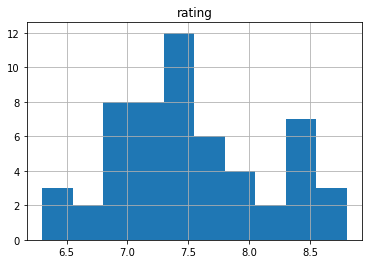

In [29]:
final_venue_details2 = final_venue_details.filter(['rating','tips'], axis=1).copy()
viz = final_venue_details2[['rating', 'tips']]
viz.hist()
plt.show()

Do some linear regression with the rating and tips data

In [30]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt  # To visualize
X = final_venue_details.iloc[:, 3].values.reshape(-1, 1)  # values converts it into a numpy array
Y = final_venue_details.iloc[:, 4].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear fregression
Y_pred = linear_regressor.predict(X)  # make predictions

Quick look at the rating numbers using a linear regression model.

In [ ]:
Make a simple regression model

In [31]:
msk = np.random.rand(len(final_venue_details)) < 0.8
train = final_venue_details[msk]
test = final_venue_details[~msk]

## Results<a id='results' name="results"></a>

In [32]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['rating']])
train_y = np.asanyarray(train[['tips']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[13.72355164]]
Intercept:  [-87.68526448]


Text(0, 0.5, 'tips')

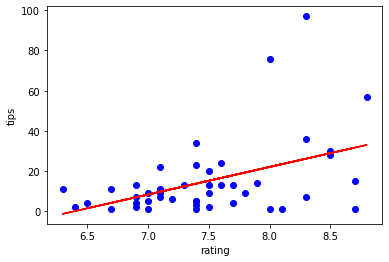

In [33]:
plt.scatter(train.rating, train.tips,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("rating")
plt.ylabel("tips")

Lets run our model with the Hue data

In [34]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['rating']])
test_y = np.asanyarray(test[['tips']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 16.17
Residual sum of squares (MSE): 509.43
R2-score: -0.06


Not a very good model as the R2 value is veru low. As the Hue data isn't much bigger we won't do any further work on it.

## Lets have a look at the types of venues in Da Nang as a wordcloud

In [35]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [36]:
values = ','.join(str(v) for v in nearby_danang['categories']) 
wordcloud = WordCloud(width=1200, height=800).generate(values) 
stopwords = set(STOPWORDS)

In [37]:
wordcloud = WordCloud(stopwords=stopwords, background_color="pink", width=1200, height=800).generate(values)

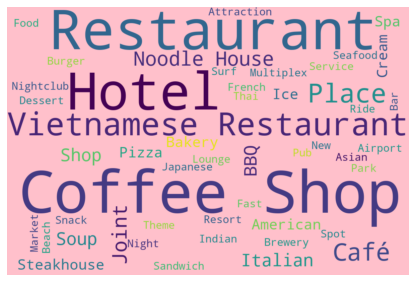

In [38]:
plt.axis("off")
plt.tight_layout(pad=1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

Ohh restuarants are popular and coffe shops

## Lets plot a bar chart for the Hue data

In [39]:
count_hue = nearby_hue.groupby('categories').count()
count_hue.sort_values(by = ['name'], inplace=True, ascending=False)
count_hue = count_hue['name']
print("List of placers in Hue")
count_hue

List of placers in Hue


categories
Vietnamese Restaurant            16
Hotel                            14
Café                              4
Vegetarian / Vegan Restaurant     3
Bed & Breakfast                   3
Historic Site                     2
Noodle House                      2
Museum                            1
Shopping Mall                     1
Seafood Restaurant                1
Sandwich Place                    1
Restaurant                        1
Rest Area                         1
Pub                               1
Palace                            1
BBQ Joint                         1
Movie Theater                     1
Monument / Landmark               1
Bakery                            1
Indian Restaurant                 1
Hotel Pool                        1
History Museum                    1
French Restaurant                 1
Food Truck                        1
Breakfast Spot                    1
Bar                               1
Italian Restaurant                1
Name: name, dtype

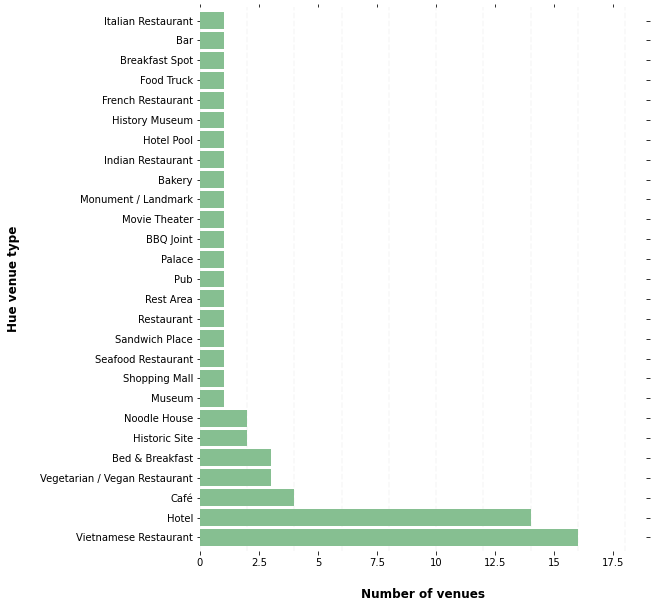

In [40]:
from matplotlib.ticker import StrMethodFormatter
ax = count_hue.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

  # Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

  # Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

  # Set x-axis label
ax.set_xlabel("Number of venues", labelpad=20, weight='bold', size=12)

  # Set y-axis label
ax.set_ylabel("Hue venue type", labelpad=20, weight='bold', size=12)

  # Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

## Lets plot the venues out for Da Nang

In [41]:
count_danang = nearby_danang.groupby('categories').count()
count_danang.sort_values(by = ['name'], inplace=True, ascending=False)
count_danang = count_danang['name']
print("List of places in Da Nang")
count_danang

List of places in Da Nang


categories
Coffee Shop                     18
Hotel                           13
Vietnamese Restaurant           11
Café                             6
Restaurant                       4
Noodle House                     4
Soup Place                       3
Italian Restaurant               3
BBQ Joint                        3
Pizza Place                      2
Bakery                           2
Spa                              2
Steakhouse                       2
Ice Cream Shop                   2
Pub                              1
Resort                           1
Theme Park Ride / Attraction     1
Surf Spot                        1
Sandwich Place                   1
Snack Place                      1
Nightclub                        1
Thai Restaurant                  1
Seafood Restaurant               1
Airport Service                  1
Night Market                     1
New American Restaurant          1
Multiplex                        1
American Restaurant              1
Japanese 

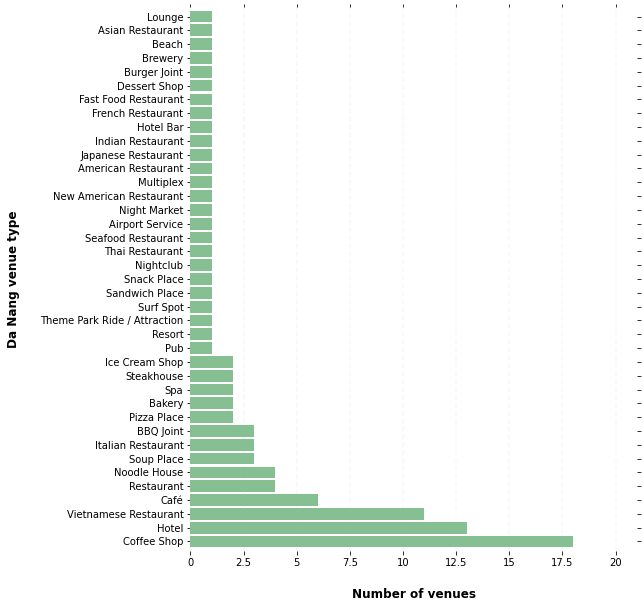

In [42]:
ax = count_danang.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

  # Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

  # Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

  # Set x-axis label
ax.set_xlabel("Number of venues", labelpad=20, weight='bold', size=12)

  # Set y-axis label
ax.set_ylabel("Da Nang venue type", labelpad=20, weight='bold', size=12)

  # Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

# Discussion<a id='discussion' name="discussion"></a>

In [43]:
print("There are ",count_danang.shape[0], "types of places to visit in Da Nang and ",count_hue[0],"types of places to visit in Hue.")

There are  39 types of places to visit in Da Nang and  16 types of places to visit in Hue.


Nothing interesting but the data is confusing a lot different types of resturants for example  fast food, Burger joint and Sandwich place in the Da Nang data.


We managed to create a regression model of the relationship between the number of tips and the rating but the R@ value was very low. This could be due to the low amount of data used to create the model or that there is no meaningful relationship. FourSquare says that it uses an algorithmn to create the rating value and explanantion can be found here 

%%html
<a href="https://medium.com/foursquare-direct/finding-the-perfect-10-how-we-developed-the-foursquare-venue-rating-system-c76b08f7b9b3">FourSquare algorithmn</a>

# Conclusion<a id='conclusion' name="conclusion"></a>

Foursquare isn't really used in Vietnam. Maybe Google maps, Tripadvisor, Booking is better for South East  Asia. And of course Covid19, there are no international tourists in Vietnam at the moment. In fact there have'nt been many since March 2020. If anything the results of this exploration could very well show that as the data sets are very small.